In [3]:
from __future__ import division
# from matplotlib.axes import *
# from matplotlib.ticker import * 

# For 'Data Preprocessing' and 'Data Manipulation' Parts:
import gc
import psutil
#import line_profiler # For line by line time counting (https://toucantoco.com/en/tech-blog/tech/python-performance-optimization)
import cProfile # For whole lines time counting (https://toucantoco.com/en/tech-blog/tech/python-performance-optimization)  
import time
import os
#import boto3
import io
import pandas as pd
import numpy as np
import scipy as sp
#import regex as re
import re
import csv
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import kurtosis, skew, mode
from urllib.request import urlopen
import json 
#from pandas.io.json import json_normalize
import urllib
import urllib.request
import requests
#import statsmodels
#import statsmodels.api as sm
#import shapely
from IPython.display import Image
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%config InlineBackend.figure_format='retina'
from matplotlib.widgets import Button
#from ipywidgets import *
import seaborn as sns
#from ipywidgets import interact
from ipywidgets import widgets, interactive
from IPython.display import display

import datetime
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

sns.set(font='sans')
import matplotlib.ticker as ticker
import gzip
from codecs import open
from collections import defaultdict

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer

#import category_encoders as ce   # version 1.2.8
pd.options.display.float_format = '{:.4f}'.format # to make legible
#from memory_profiler import profile
#%load_ext memory_profiler
import joblib
print(sklearn.__version__)
import sys
print(sys.version)
# import pyspark
# from pyspark import SparkConf
# from pyspark import SparkContext
# from pyspark.sql import SparkSession
# from pyspark.sql import SQLContext
# from pyspark.sql.types import *
# from pyspark.sql import functions as F

0.22.1
3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]


In [4]:
csv = pd.read_csv('hmeq.csv')
data = csv.copy()
data.count()

BAD        5960
LOAN       5960
MORTDUE    5442
VALUE      5848
REASON     5708
JOB        5681
YOJ        5445
DEROG      5252
DELINQ     5380
CLAGE      5652
NINQ       5450
CLNO       5738
DEBTINC    4693
dtype: int64

In [5]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.0000,HomeImp,Other,10.5000,0.0000,0.0000,94.3667,1.0000,9.0000,nan
1,1,1300,70053.0000,68400.0000,HomeImp,Other,7.0000,0.0000,2.0000,121.8333,0.0000,14.0000,nan
2,1,1500,13500.0000,16700.0000,HomeImp,Other,4.0000,0.0000,0.0000,149.4667,1.0000,10.0000,nan
3,1,1500,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
4,0,1700,97800.0000,112000.0000,HomeImp,Office,3.0000,0.0000,0.0000,93.3333,0.0000,14.0000,nan


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0000,0.1995,0.3997,0.0000,0.0000,0.0000,0.0000,1.0000
LOAN,5960.0000,18607.9698,11207.4804,1100.0000,11100.0000,16300.0000,23300.0000,89900.0000
MORTDUE,5442.0000,73760.8172,44457.6095,2063.0000,46276.0000,65019.0000,91488.0000,399550.0000
VALUE,5848.0000,101776.0487,57385.7753,8000.0000,66075.5000,89235.5000,119824.2500,855909.0000
YOJ,5445.0000,8.9223,7.5740,0.0000,3.0000,7.0000,13.0000,41.0000
DEROG,5252.0000,0.2546,0.8460,0.0000,0.0000,0.0000,0.0000,10.0000
DELINQ,5380.0000,0.4494,1.1273,0.0000,0.0000,0.0000,0.0000,15.0000
CLAGE,5652.0000,179.7663,85.8101,0.0000,115.1167,173.4667,231.5623,1168.2336
NINQ,5450.0000,1.1861,1.7287,0.0000,0.0000,1.0000,2.0000,17.0000
CLNO,5738.0000,21.2961,10.1389,0.0000,15.0000,20.0000,26.0000,71.0000


In [8]:
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    
    import psutil, os, gc, time
    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        buf = io.StringIO()
        df[[col]].info(buf=buf)
        data_info = buf.getvalue().split('\n') #converting to a string object done
        entry_lenght = int(data_info[1].split(' ')[1])
        variable_name = data_info[3].split(' ')[0]
        total_entry = int(data_info[3].split('    ')[1].split(' ')[0])
        missing_value_number = entry_lenght - total_entry
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        data_type = data_info[3].split('    ')[1].split(' ')[2]

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [9]:
data_analysis = MissingUniqueStatistics(data)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0012435158093770345 minutes ---


In [10]:
data_analysis.set_index("Variable",inplace=True)
data_analysis

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
Variable,,,,,,
DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694
DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12
DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15
MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054
YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100
NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17
CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315
JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7
REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3


In [11]:
%matplotlib inline
# Histogram of the target categories
def histogram(data,feature):
    #data = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #data=eval(data)
    ncount = len(data)
    ax = sns.countplot(x = feature, data=data ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

In [12]:
data_analysis['variableTypes'] = pd.Series(['continuous-ratio','discrete','discrete','continuous-ratio','discrete','discrete','continuous-ratio','nominal','nominal','discrete','continuous-ratio','nominal','continuous-ratio'],index=data_analysis.index)

In [13]:
data_analysis

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,variableTypes
Variable,,,,,,,
DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,continuous-ratio
DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,discrete
DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,discrete
MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,continuous-ratio
YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,discrete
NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,discrete
CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,continuous-ratio
JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,nominal
REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,nominal


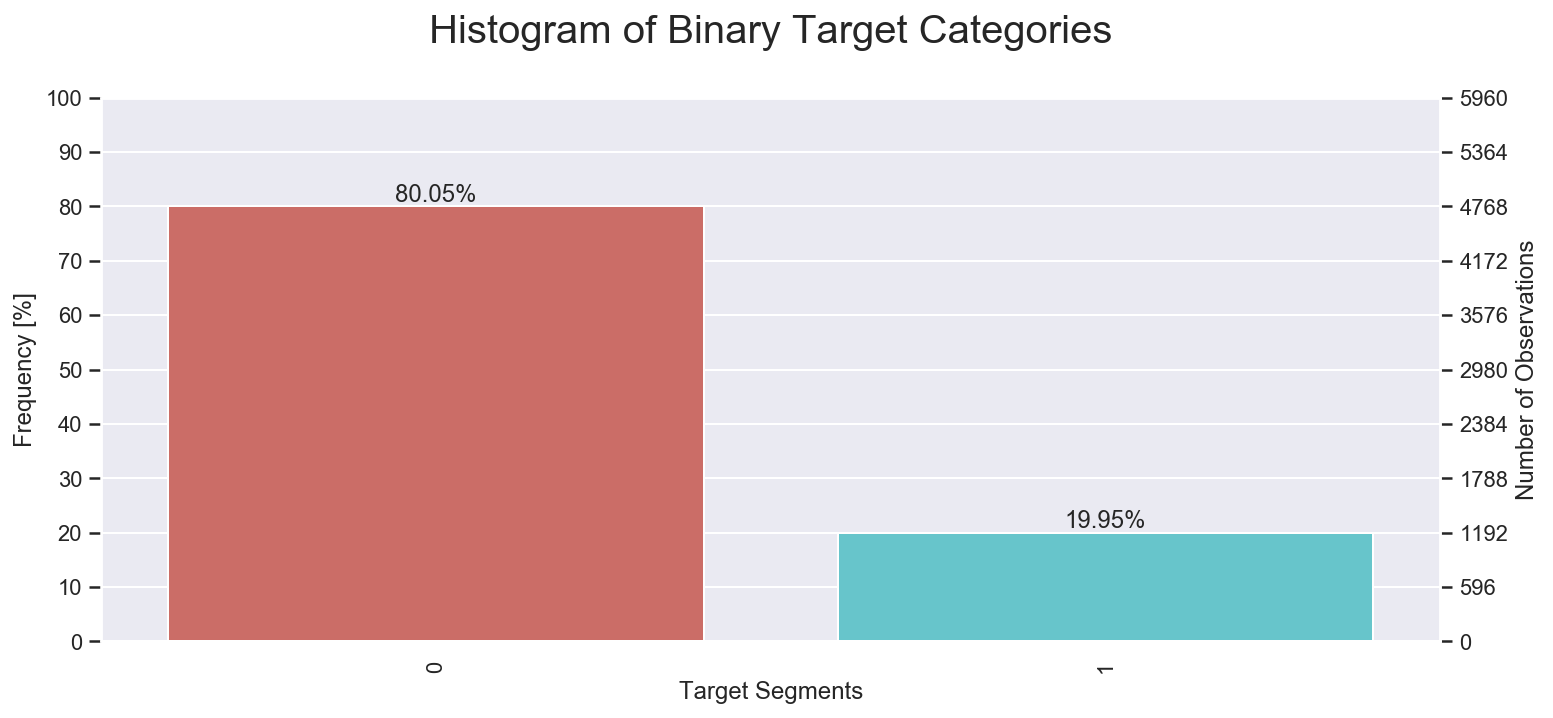

In [14]:
histogram(data,"BAD")

In [15]:
data_analysis['Missing_Elimination']=""
for i in range(0,len(data_analysis)) :
    if data_analysis['%_Missing_Value'][i] == (0.00):
        data_analysis['Missing_Elimination'][i]='NaN'
    elif data_analysis['%_Missing_Value'][i] <= (0.05):
        data_analysis['Missing_Elimination'][i]='Simple'
    elif data_analysis['%_Missing_Value'][i] < (0.25):
        data_analysis['Missing_Elimination'][i]='Tree-based'
    elif data_analysis['%_Missing_Value'][i] < (0.5) :
        data_analysis['Missing_Elimination'][i]='Model'


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
data_analysis

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,variableTypes,Missing_Elimination
Variable,,,,,,,,
DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,continuous-ratio,Tree-based
DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,discrete,Tree-based
DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,discrete,Tree-based
MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,continuous-ratio,Tree-based
YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,discrete,Tree-based
NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,discrete,Tree-based
CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,continuous-ratio,Tree-based
JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,nominal,Simple
REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,nominal,Simple


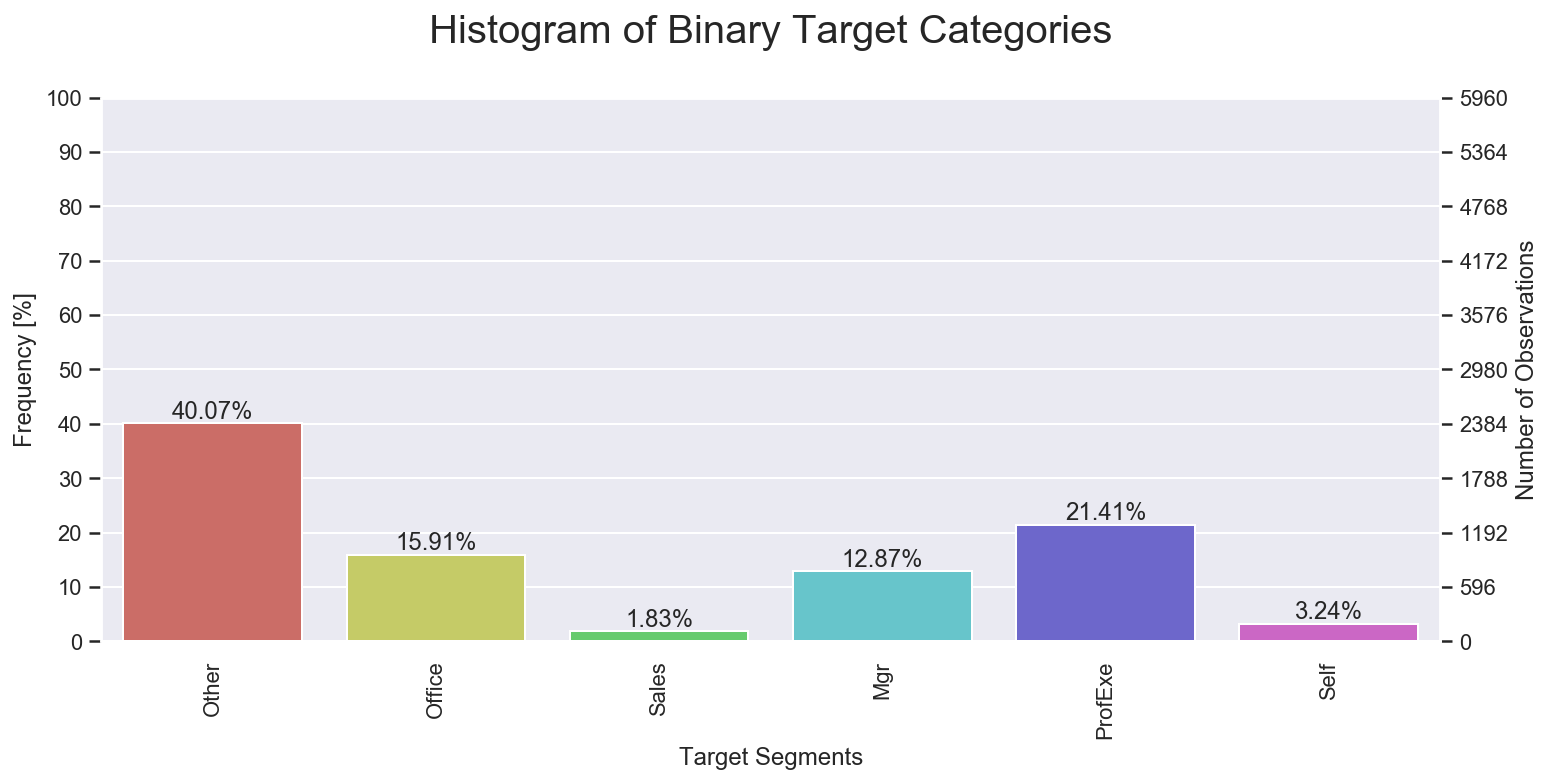

In [17]:
histogram(data, "JOB")

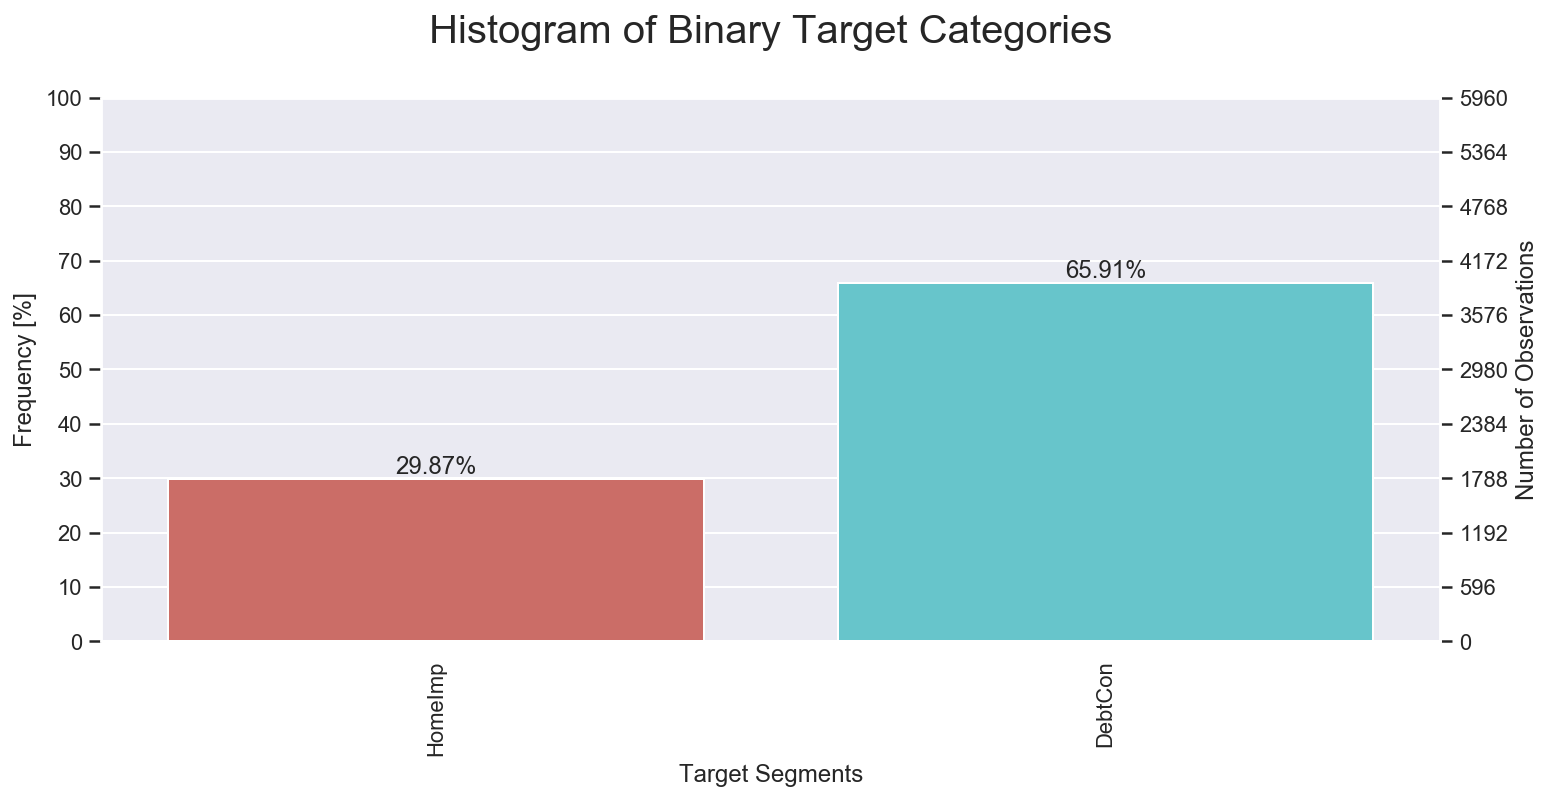

In [18]:
histogram(data, "REASON")

In [19]:
data.groupby("JOB")["VALUE"].mean()

JOB
Mgr       108628.2627
Office     94081.8168
Other      84787.5034
ProfExe   131118.2041
Sales     108449.5926
Self      149734.1064
Name: VALUE, dtype: float64

In [20]:
def bar_chart(feature):
    status_bad = data[data['BAD']==1][feature].value_counts()
    status_good = data[data['BAD']==0][feature].value_counts()
    df_t = pd.DataFrame([status_bad,status_good])
    df_t.index=["BAD","GOOD"]
    df_t.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

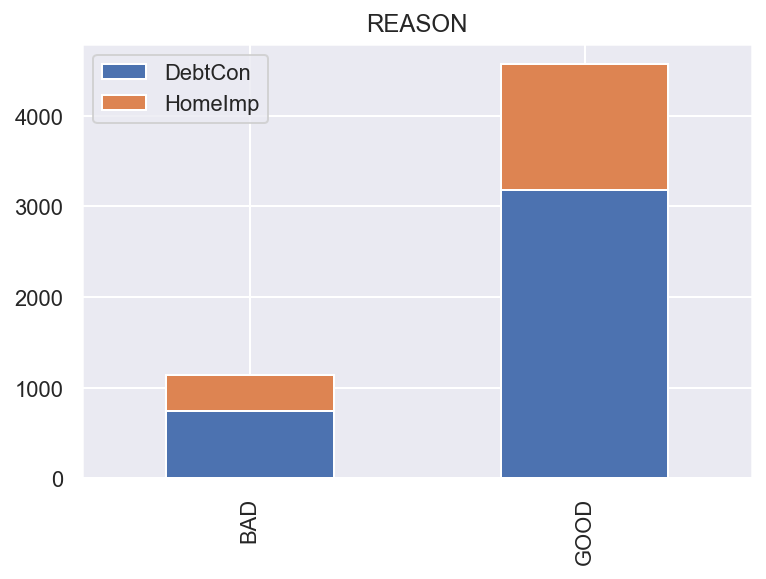

In [21]:
bar_chart("REASON")

In [22]:
data.corr(method ='pearson') 

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.0000,-0.0751,-0.0482,-0.0300,-0.0602,0.2761,0.3541,-0.1705,0.1750,-0.0042,0.1998
LOAN,-0.0751,1.0000,0.2286,0.3354,0.1057,-0.0013,-0.0351,0.0885,0.0445,0.0726,0.0847
MORTDUE,-0.0482,0.2286,1.0000,0.8757,-0.0885,-0.0495,-0.0010,0.1400,0.0314,0.3236,0.1549
VALUE,-0.0300,0.3354,0.8757,1.0000,0.0078,-0.0487,-0.0141,0.1712,-0.0044,0.2691,0.1322
YOJ,-0.0602,0.1057,-0.0885,0.0078,1.0000,-0.0659,0.0382,0.2017,-0.0716,0.0248,-0.0559
DEROG,0.2761,-0.0013,-0.0495,-0.0487,-0.0659,1.0000,0.2118,-0.0830,0.1739,0.0619,0.0171
DELINQ,0.3541,-0.0351,-0.0010,-0.0141,0.0382,0.2118,1.0000,0.0225,0.0678,0.1646,0.0524
CLAGE,-0.1705,0.0885,0.1400,0.1712,0.2017,-0.0830,0.0225,1.0000,-0.1169,0.2380,-0.0465
NINQ,0.1750,0.0445,0.0314,-0.0044,-0.0716,0.1739,0.0678,-0.1169,1.0000,0.0884,0.1413
CLNO,-0.0042,0.0726,0.3236,0.2691,0.0248,0.0619,0.1646,0.2380,0.0884,1.0000,0.1855


C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


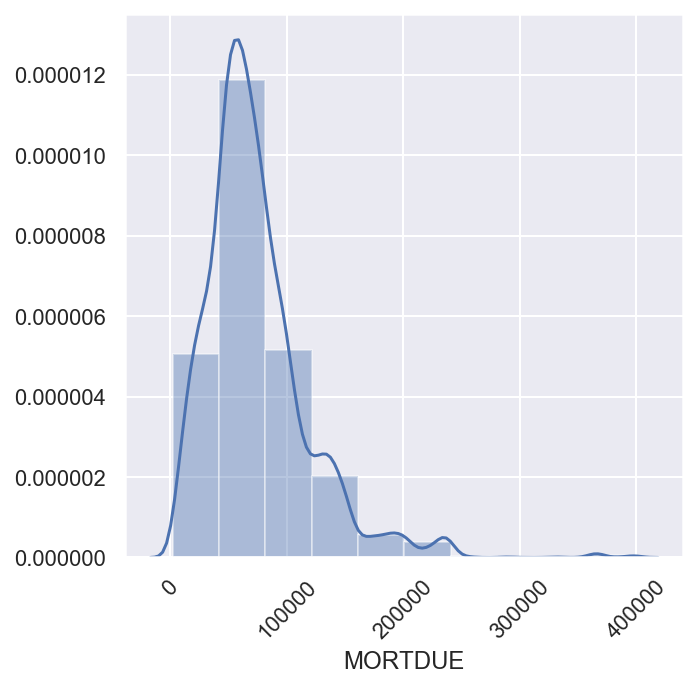

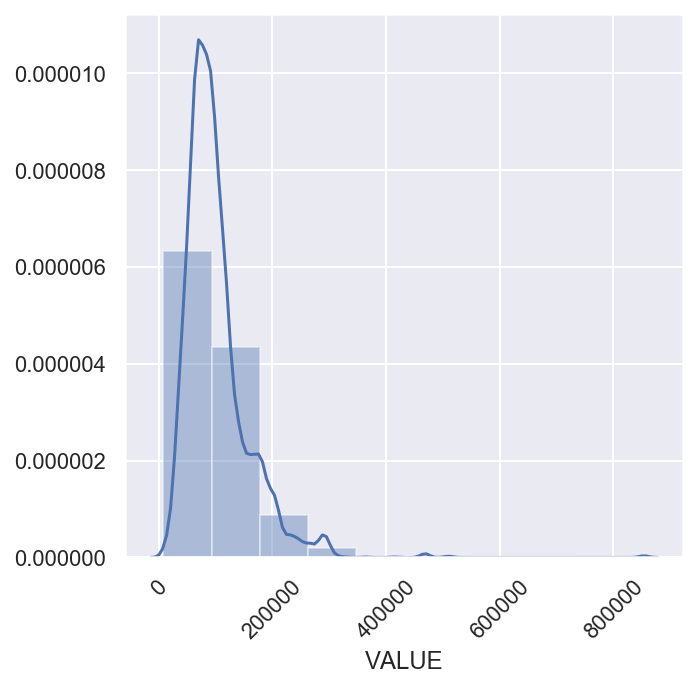

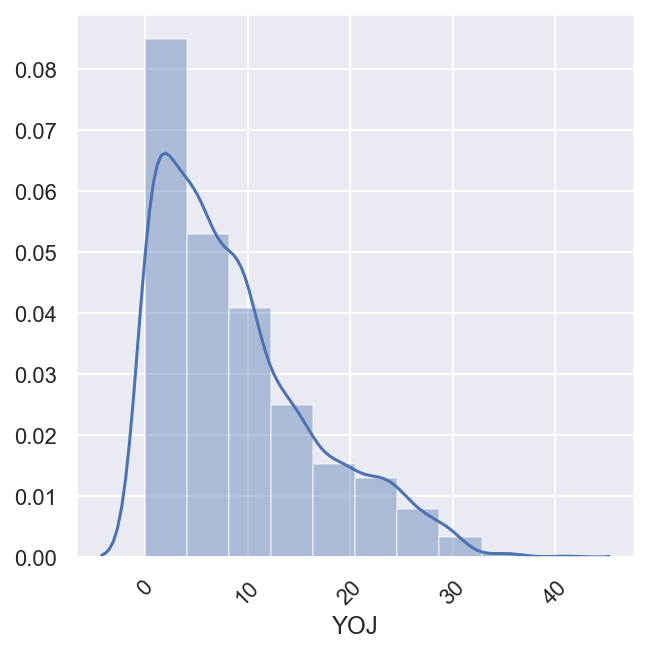

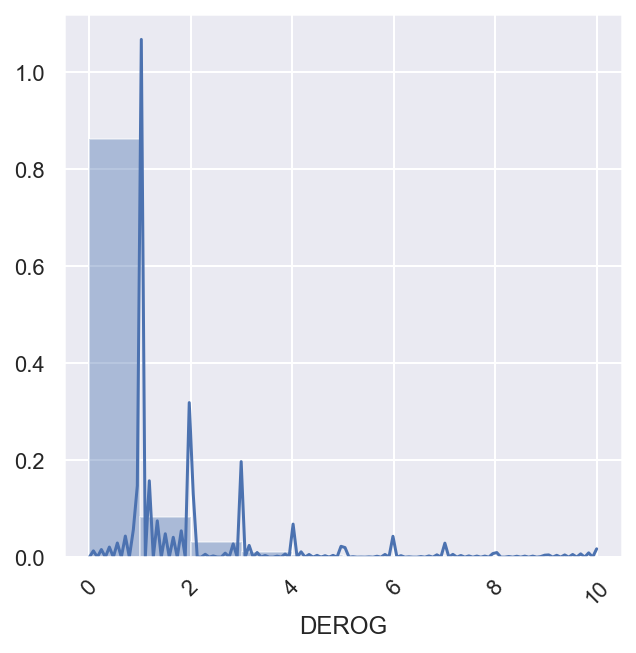

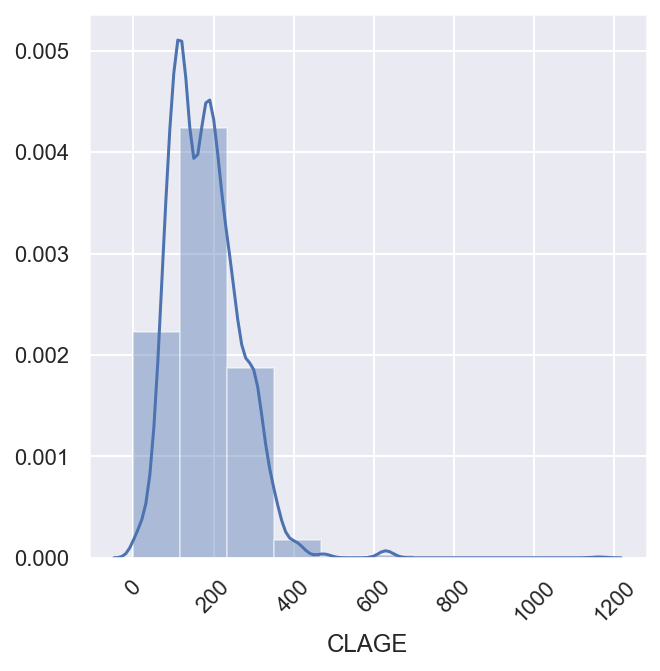

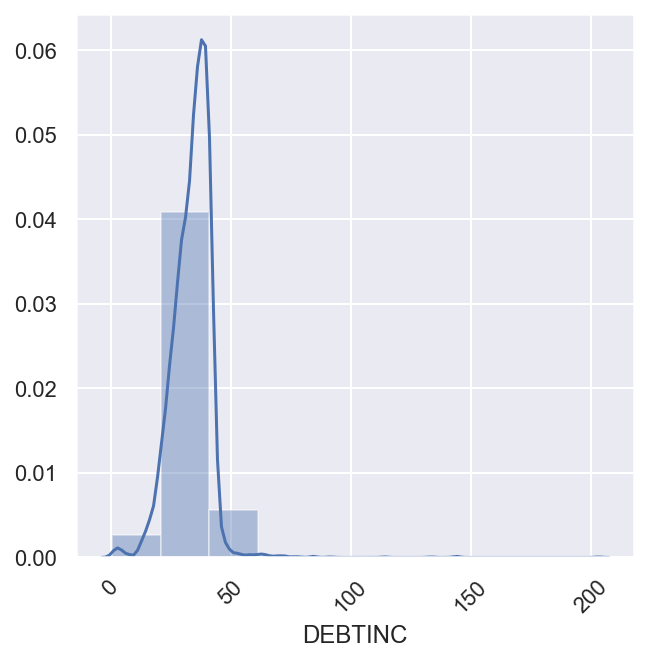

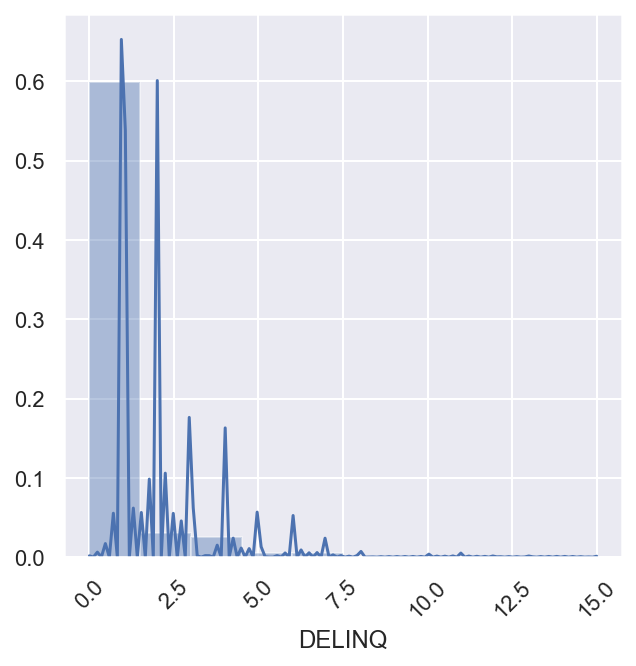

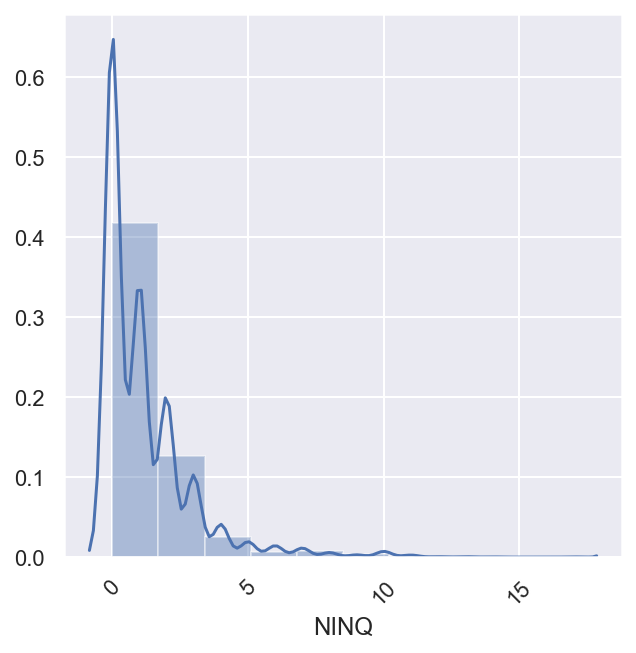

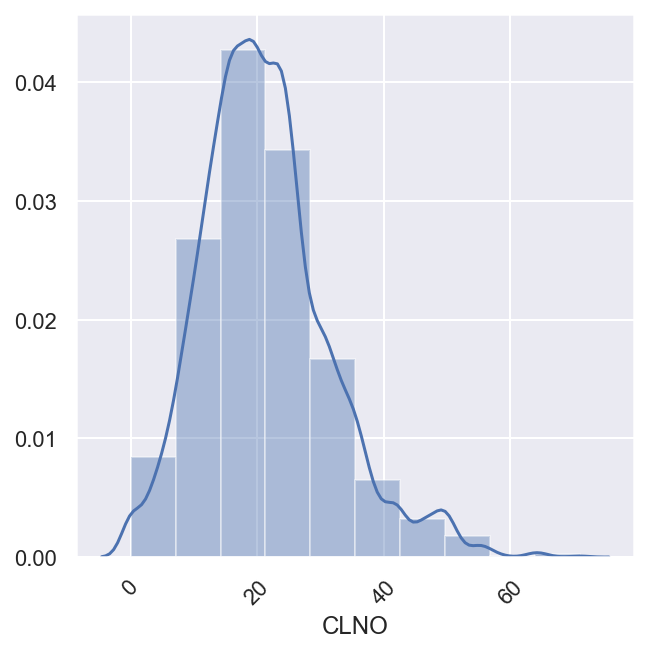

In [23]:
# Numerical features
numerical_cols = [cname for cname in data.columns if
                 data[cname].dtype in ['float']]
num = data[numerical_cols]
num.columns

# Visualizations
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['MORTDUE','VALUE','YOJ','DEROG','CLAGE','DEBTINC','DELINQ','NINQ','CLNO']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()

In [24]:
len(data.index) == data.shape[0]

True

In [25]:
numerical_columns = list(data_analysis.loc[(data_analysis.loc[:,"variableTypes"]=="discrete") | (data_analysis.loc[:,"variableTypes"]=="continuous-ratio")].index)
len(numerical_columns), numerical_columns

(10,
 ['DEBTINC',
  'DEROG',
  'DELINQ',
  'MORTDUE',
  'YOJ',
  'NINQ',
  'CLAGE',
  'CLNO',
  'VALUE',
  'LOAN'])

In [26]:
def ZeroVarianceFinder(df, numerical_columns):
  
  import pandas as pd
  import numpy as np

  zerovariance_numerical_features=[]
  for col in numerical_columns:
      try:
          if (pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00) or np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
              zerovariance_numerical_features.append(col)
      except:
          print("Error:",col)
  return zerovariance_numerical_features

In [27]:
zerovariance_numerical_features = ZeroVarianceFinder(data,numerical_columns)

In [28]:
zerovariance_numerical_features

[]

In [29]:
categorical_columns = list(data_analysis.loc[(data_analysis.variableTypes=="nominal") | (data_analysis.variableTypes=="ordinal")].index)
len(categorical_columns), categorical_columns

(3, ['JOB', 'REASON', 'BAD'])

In [30]:
singleton_categorics=[]
for col in categorical_columns:
  if len(data[col].unique()) <=1:
    singleton_categorics.append(col)
len(singleton_categorics),singleton_categorics

(0, [])

In [31]:
X=data.iloc[:,1:]
y=data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4172, 12) (1788, 12) (4172,) (1788,)


In [32]:
df_train = data.copy()
numerical_columns_remains = numerical_columns

try:
    with open('left_skewed_columns.csv', 'r') as f:
        left_skewed_columns = list(csv.reader(f))[0][:-1]
except:
    if 'left_skewed_columns' not in globals():
        left_skewed_columns=[]
        for col in numerical_columns_remains:
            if df_train.loc[df_train[col]!=df_train[col].mode()[0],col].median() < -1:
                left_skewed_columns.append(col)

        with open('left_skewed_columns.csv','w') as f:
            for item in left_skewed_columns:
                f.write('%s,'%item)
    else:
        print("'left_skewed_columns' are already identified!")

epsilon=0.001

# Change the direction of skewness of 'left_skewed_columns':
for col in left_skewed_columns:
    if df_train[df_train[col]!=df_train[col].mode()[0]][col].median() < -1:
        df_train.loc[:,col] *= -1
    else:
        continue
        
sparse_columns=[]
for col in numerical_columns_remains:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)==df_train[col].mode()[0]):
        sparse_columns.append(col)

sparse_columns_2=[]
for col in numerical_columns_remains:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)):
        sparse_columns_2.append(col)

'''
boosting_columns=[]
for col in lst_target_deleted:
    if (df_raw_data[col].quantile(0.5) - df_raw_data[col].quantile(0.01)) / \
    (df_raw_data[col].quantile(0.99) + epsilon)  < 0.05:
        boosting_columns.append(col)
'''
len(numerical_columns_remains), len(sparse_columns), len(sparse_columns_2)

(10, 3, 3)

In [33]:
sparse_columns

['DEROG', 'DELINQ', 'NINQ']

In [34]:
def HardEdgeReduction(df,numerical_columns,sparse_columns,upper_quantile=0.98,lower_quantile=0.02):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

    # Define boundaries that we will use for Reduction operation

    df_outlier_cleaned = df.copy()

    print("Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!\n")
    print("Total number of rows is: %s\n"%df_outlier_cleaned.shape[0])

    outlier_boundries_dict={}

    for col in numerical_columns:

        if col in sparse_columns:

            # First ignore the 'sparse' data points:
            nonsparse_data = pd.DataFrame(df_outlier_cleaned[df_outlier_cleaned[col] !=\
                                                             df_outlier_cleaned[col].mode()[0]][col]) 
            
            #we used only mode to catch sparse points, since we know/proved it is enough to do that.

            # Find Outlier Thresholds:
            # Note: All columns are right-skewed
            # For lower threshold (left-hand-side)
            if nonsparse_data[col].quantile(lower_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = df_outlier_cleaned[col].mode()[0]
            
            # For upper threshold (right-hand-side)
            if nonsparse_data[col].quantile(upper_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                upper_bound_sparse = df_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)

            # Inform user about the cardinality of Outlier existence:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (df_outlier_cleaned[col] > upper_bound_sparse)][col])
            print("Sparse: Outlier number in %s is equal to: "%col,number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Replace Outliers with Edges --> 2% and 98%:
            if number_of_outliers > 0:

                # Replace 'left-hand-side' outliers with its 1% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # --> MAIN DF CHANGED

                # Replace 'right-hand-side' outliers with its 99% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # --> MAIN DF CHANGED

        else:
            # Find Edges:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < \
                                                         df_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (df_outlier_cleaned[col] > \
                                                         df_outlier_cleaned[col].quantile(upper_quantile))]\
                                     [col])
            result = number_of_outliers/(df[col].shape[0] - df[col].isnull().sum())
            print("Other: Outlier number in {} is equal to: ".format(col),round(result,4)) 

            # Replace 'Standard' outliers:
            if number_of_outliers > 0:
                # Replace all outliers with its %98 quartile
                lower_bound_sparse = df_outlier_cleaned[col].quantile(lower_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < \
                                       lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon

                upper_bound_sparse = df_outlier_cleaned[col].quantile(upper_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > \
                                       upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)


    print('HardEdgeReduction process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return df_outlier_cleaned, outlier_boundries_dict


In [35]:
df_train_outlier_cleaned, outlier_boundries_dict = HardEdgeReduction(X_train,numerical_columns,sparse_columns)

HardEdgeReduction process has began:

Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!

Total number of rows is: 4172

Other: Outlier number in DEBTINC is equal to:  0.0405
Sparse: Outlier number in DEROG is equal to:  DEROG   0.0136
dtype: float64
Sparse: Outlier number in DELINQ is equal to:  DELINQ   0.0175
dtype: float64
Other: Outlier number in MORTDUE is equal to:  0.0403
Other: Outlier number in YOJ is equal to:  0.0172
Sparse: Outlier number in NINQ is equal to:  NINQ   0.0197
dtype: float64
Other: Outlier number in CLAGE is equal to:  0.0403
Other: Outlier number in CLNO is equal to:  0.0377
Other: Outlier number in VALUE is equal to:  0.0404
Other: Outlier number in LOAN is equal to:  0.0398
HardEdgeReduction process has been completed!
--- in 0.004936416943868001 minutes ---


In [36]:
outlier_boundries_dict

{'DEBTINC': (16.355624208920002, 43.91937959768),
 'DEROG': (0.0, 7.0),
 'DELINQ': (0.0, 6.0),
 'MORTDUE': (10968.32, 202396.65999999992),
 'YOJ': (0.0, 28.0),
 'NINQ': (0.0, 8.0),
 'CLAGE': (50.493716047899994, 355.6080621049999),
 'CLNO': (3.5400000000000063, 49.0),
 'VALUE': (31196.239999999998, 260450.26),
 'LOAN': (4800.0, 50800.0)}

In [37]:
# Do outlier cleaning in only one loop
epsilon = 0.0001 # for zero divisions

# Define boundaries that we will use for Reduction operation
upper_quantile = 0.99
lower_quantile = 0.01

df_test_outlier_cleaned = X_test.copy()

print("Detected outliers will be replaced with edged quantiles/percentiles: 2% and 98%!\n")
print("Total number of rows is: %s\n"%df_train_outlier_cleaned.shape[0])

for col in numerical_columns_remains:

      lower_bound = outlier_boundries_dict[col][0]
      upper_bound = outlier_boundries_dict[col][1]
        
      # Inform user about the cardinality of Outlier existence:
      number_of_outliers = len(df_test_outlier_cleaned[(df_test_outlier_cleaned[col] < lower_bound) |\
                                                        (df_test_outlier_cleaned[col] > upper_bound)][col])
      print("Sparse: Outlier number in %s is equal to: "%col, number_of_outliers/
            (df_test_outlier_cleaned[col].shape[0] - df_test_outlier_cleaned[col].isnull().sum()))

      # Replace Outliers with Edges --> 1% and 99%:
      if number_of_outliers > 0:

          # Replace 'left-hand-side' outliers with its 1% quantile value
          df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] < lower_bound,col] = lower_bound  - epsilon # --> MAIN DF CHANGED
          
          # Replace 'right-hand-side' outliers with its 99% quantile value
          df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] > upper_bound,col] = upper_bound  + epsilon # --> MAIN DF CHANGED
        

Detected outliers will be replaced with edged quantiles/percentiles: 2% and 98%!

Total number of rows is: 4172

Sparse: Outlier number in DEBTINC is equal to:  0.04755043227665706
Sparse: Outlier number in DEROG is equal to:  0.0025493945188017845
Sparse: Outlier number in DELINQ is equal to:  0.006853582554517134
Sparse: Outlier number in MORTDUE is equal to:  0.033866995073891626
Sparse: Outlier number in YOJ is equal to:  0.015537600994406464
Sparse: Outlier number in NINQ is equal to:  0.009236453201970444
Sparse: Outlier number in CLAGE is equal to:  0.045077105575326216
Sparse: Outlier number in CLNO is equal to:  0.031578947368421054
Sparse: Outlier number in VALUE is equal to:  0.040137614678899085
Sparse: Outlier number in LOAN is equal to:  0.04530201342281879


In [38]:
Zero_MR_variables_list = list(data_analysis[data_analysis['%_Missing_Value']==0].index)
Low_MR_variables_list = list(data_analysis[(data_analysis['%_Missing_Value']>0)&
                                       (data_analysis['%_Missing_Value']<=0.05)].index)
Moderate_MR_variables_list = list(data_analysis[(data_analysis['%_Missing_Value']>0.05)&\
                                                      (data_analysis['%_Missing_Value']<=0.25)].index)
High_MR_variables_list = list(data_analysis[(data_analysis['%_Missing_Value']>0.25)&\
                                                  (data_analysis['%_Missing_Value']<=0.50)].index)
Extreme_MR_variables_list = list(data_analysis[(data_analysis['%_Missing_Value']>0.50)&
                                           (data_analysis['%_Missing_Value']<=0.95)].index)
Drop_MR_variables_list = list(data_analysis[data_analysis['%_Missing_Value']>0.95].index)

len(Zero_MR_variables_list),len(Low_MR_variables_list),len(Moderate_MR_variables_list),len(High_MR_variables_list),\
len(Extreme_MR_variables_list),\
len(Zero_MR_variables_list)+len(Low_MR_variables_list)+len(Moderate_MR_variables_list)+len(High_MR_variables_list)+\
len(Extreme_MR_variables_list) == len(data_analysis)

(2, 4, 7, 0, 0, True)

In [39]:
lst=[item for item in Low_MR_variables_list if item in categorical_columns]
data_analysis.loc[lst,"#_Unique_Values"]

Variable
JOB       7
REASON    3
Name: #_Unique_Values, dtype: int64

In [40]:
def SimpleImputers(df,data_info,variable_list):
  
  from sklearn.impute import SimpleImputer
  
  for col in variable_list:

    # Randomized Mean/Median Imputation Method (rand((mean - 2*std) & (mean + 2*std))) 

    if col in numerical_columns:
        i=col
        #Variable: '"+str(i)+"'
        exec("df[['"+str(i)+"']].isnull().sum()") #to see how many null values we have"
        # Get average, std, and number of NaN values
        exec("average_"+str(i)+" = df[['"+str(i)+"']].mean()")
        exec("average_"+str(i)+" = float(average_"+str(i)+")")
        exec("std_"+str(i)+" = df[['"+str(i)+"']].std()")
        exec("std_"+str(i)+" = float(std_"+str(i)+")")
        exec("count_nan_"+str(i)+" = df[['"+str(i)+"']].isnull().sum()")
        exec("count_nan_"+str(i)+" = int(count_nan_"+str(i)+")")
        
        # Generate random numbers between (mean - std) & (mean + std)
        #exec("rand_"+str(i)+" = np.random.uniform(average_"+str(i)+" - 2*std_"+str(i)+",
        #average_"+str(i)+" + 2*std_"+str(i)+", size = count_nan_"+str(i)+")") 
        exec("rand_"+str(i)+" = np.random.normal(loc=average_"+str(i)+",scale=std_"+str(i)+",size = count_nan_"+str(i)+")") 
        #we use uniform/normal distribution function instead of randint in order to create float random numbers

        # fill NaN values in "+str(i)+" column with random values generated
        exec(str(i)+"_slice = df['"+str(i)+"'].copy()")
        exec(str(i)+"_slice = pd.Series("+str(i)+"_slice)")
        exec(str(i)+"_slice[pd.isnull("+str(i)+"_slice)] = rand_"+str(i))
        exec("df['"+str(i)+"'] = "+str(i)+"_slice")
    #    exec("del "+str(i)+"_slice, rand_"+str(i)+", count_nan_"+str(i)+", std_"+str(i)+", average_"+str(i))

        #imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        #imputer.fit_transform(np.array(df[col]).reshape(-1,1))
        
        print("Numerical variable %s have been imputed."%col)

    elif col in categorical_columns:
      df.loc[df.loc[:,col].isnull(),col] = np.random.choice(sorted(list(df.loc[:,col].dropna().unique())),
                                                            size=int(df.loc[df.loc[:,col].isnull(),col].shape[0]),
                                                            p=[pd.Series(df.groupby(col).size()/df.loc[:,col].dropna().shape[0]).iloc[i] for i in 
                                                               np.arange(0,len(df.loc[:,col].dropna().unique()))])
                 
      print("Categorical variable %s have been imputed."%col)

      # imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      # imputer.fit_transform(df[col])

  print("Number of null values: \n", df[variable_list].isnull().sum())


  return df

In [41]:
SimpleImputers(X_train,data_analysis,Low_MR_variables_list)  # --> MAIN DF CHANGED

Categorical variable JOB have been imputed.
Categorical variable REASON have been imputed.
Numerical variable CLNO have been imputed.
Numerical variable VALUE have been imputed.
Number of null values: 
 JOB       0
REASON    0
CLNO      0
VALUE     0
dtype: int64


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5774,45900,52720.0000,115224.0000,DebtCon,Other,nan,0.0000,1.0000,126.1165,0.0000,21.0000,nan
5098,27300,97373.0000,126102.0000,DebtCon,Office,10.0000,0.0000,1.0000,139.1326,0.0000,28.0000,39.1736
5428,31900,23517.0000,47805.0000,DebtCon,Other,0.0000,0.0000,0.0000,78.8136,0.0000,7.0000,16.7277
257,5500,71644.0000,72696.0000,HomeImp,Sales,4.0000,2.0000,0.0000,150.8658,0.0000,22.0000,40.4426
507,7100,54000.0000,74800.0000,DebtCon,Mgr,7.5000,1.0000,1.0000,71.0000,4.0000,18.0000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,20000,99300.0000,139150.0000,HomeImp,ProfExe,10.0000,0.0000,0.0000,162.3667,1.0000,23.0000,nan
5191,28000,49764.0000,74526.0000,DebtCon,Other,24.0000,nan,1.0000,294.5948,1.0000,30.0000,37.6113
5226,28300,71973.0000,119224.0000,DebtCon,Other,4.0000,0.0000,0.0000,89.3800,2.0000,32.0000,39.9811
5390,31100,73386.0000,108864.0000,HomeImp,Other,5.0000,nan,nan,119.5395,10.0000,21.0000,42.8266


In [42]:
MissingUniqueStatistics(X_train.loc[:,Low_MR_variables_list])

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.00021654764811197916 minutes ---


,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
0,JOB,4172,0,0.0000,object,"[Other, Office, Sales, Mgr, ProfExe, Self]",6
1,REASON,4172,0,0.0000,object,"[DebtCon, HomeImp]",2
2,CLNO,4172,0,0.0000,float64,"[21.0, 28.0, 7.0, 22.0, 18.0, 24.0, 19.0, 51.0...",205
3,VALUE,4172,0,0.0000,float64,"[115224.0, 126102.0, 47805.0, 72696.0, 74800.0...",3897


In [43]:
from sklearn import base
from sklearn.model_selection import KFold
class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = False, random_state=2020)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = \
            X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'\
                  .format(col_mean_name,self.targetName,
                          np.corrcoef(X[self.targetName].values,
                                      encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [44]:
lst=[item for item in Moderate_MR_variables_list if item in categorical_columns]
lst

[]

In [55]:
encoding_col_list = list(set(categorical_columns)-set(["BAD"]))
encoding_col_list

['JOB', 'REASON']

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPRegressor
!pip install category_encoders
from category_encoders import BinaryEncoder

encoding_col_list = list(set(categorical_columns)-set(["BAD"]))
be = BinaryEncoder()
X_train_binary_encoded = be.fit_transform(X_train, cols=encoding_col_list)

X_train_scaled = X_train_binary_encoded.copy()
for col in numerical_columns:
  
  scaler = StandardScaler()
  X_train_scaled.loc[:,col] = scaler.fit_transform(np.array(X_train_scaled.loc[:,col]).reshape(-1,1))
  # X_train_scaled.loc[:,col] = (X_train_scaled[col] -
  #                              X_train_scaled[col].mean()) /\
  #                              X_train_scaled[col].std()

for col in lst:
  
  X_train_target_dropped_fullcases = X_train_scaled.drop(col,axis=1).loc[:,list(set(Zero_MR_variables_list+Low_MR_variables_list+
                                                                                    ['REASON_0']+['REASON_1']+['JOB_0']+['JOB_1']+['JOB_2']+['JOB_3'])-set(['BAD']+['REASON']+['JOB']))].copy()
  
  target = X_train_scaled.loc[:,col]
  null_mask = target.isna()

  mlp = MLPRegressor(hidden_layer_sizes=(100,10,),
                     activation='tanh',
                     solver='adam',
                     learning_rate='adaptive',
                     max_iter=1000,
                     learning_rate_init=0.01,
                     alpha=0.01,
                     early_stopping = False)
  
  mlp.fit(X_train_target_dropped_fullcases[~null_mask],target[~null_mask])
  X_train_scaled.loc[null_mask,col] = mlp.predict(X_train_target_dropped_fullcases[null_mask])

print(X_train_scaled.loc[:,lst].isnull().sum());

DEBTINC    0
DEROG      0
DELINQ     0
MORTDUE    0
YOJ        0
NINQ       0
CLAGE      0
dtype: int64


In [59]:
X_train_scaled

,LOAN,MORTDUE,VALUE,REASON_0,REASON_1,JOB_0,JOB_1,JOB_2,JOB_3,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5774,2.4639,-0.4725,0.2310,0,1,0,0,0,1,-0.1586,-0.3045,0.5506,-0.6271,-0.6784,-0.0297,0.2420
5098,0.7814,0.5203,0.4202,0,1,0,0,1,0,0.1364,-0.3045,0.5506,-0.4766,-0.6784,0.6596,0.6847
5428,1.1975,-1.1218,-0.9417,0,1,0,0,0,1,-1.1725,-0.3045,-0.3941,-1.1742,-0.6784,-1.4082,-2.1185
257,-1.1906,-0.0518,-0.5087,1,0,0,0,1,1,-0.6489,2.0371,-0.3941,-0.3409,-0.6784,0.0688,0.8432
507,-1.0458,-0.4440,-0.4721,0,1,0,1,0,0,-0.1908,0.8663,0.5506,-1.2645,1.6024,-0.3251,-0.0742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.1211,0.5631,0.6472,1,0,0,1,0,1,0.1364,-0.3045,-0.3941,-0.2079,-0.1082,0.1673,-0.2149
5191,0.8447,-0.5382,-0.4769,0,1,0,0,0,1,1.9688,0.4730,0.5506,1.3213,-0.1082,0.8566,0.4896
5226,0.8718,-0.0444,0.3006,0,1,0,0,0,1,-0.6489,-0.3045,-0.3941,-1.0520,0.4620,1.0535,0.7855
5390,1.1251,-0.0130,0.1204,1,0,0,0,0,1,-0.5181,-0.0469,-0.9446,-0.7032,5.0235,-0.0297,1.1409


In [60]:
def VariableConverter(df,col):
    
    df[df[col].isnull()][col]='NaN' 
    df[col] = df[col].astype('object')  
    
    return df

In [61]:
MissingUniqueStatistics(X_train_scaled)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0008161822954813639 minutes ---


,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
0,LOAN,4172,0,0.0000,float64,"[2.4638912672112183, 0.7813878112962254, 1.197...",491
1,MORTDUE,4172,0,0.0000,float64,"[-0.47250181182318796, 0.5202980951148315, -1....",3948
2,VALUE,4172,0,0.0000,float64,"[0.2310263337444342, 0.42024008874804014, -0.9...",3897
3,REASON_0,4172,0,0.0000,int64,"[0, 1]",2
4,REASON_1,4172,0,0.0000,int64,"[1, 0]",2
5,JOB_0,4172,0,0.0000,int64,[0],1
6,JOB_1,4172,0,0.0000,int64,"[0, 1]",2
7,JOB_2,4172,0,0.0000,int64,"[0, 1]",2
8,JOB_3,4172,0,0.0000,int64,"[1, 0]",2
9,YOJ,4172,0,0.0000,float64,"[-0.15862429869109962, 0.13638785493917036, -1...",421


In [64]:
MissingUniqueStatistics(df_test_outlier_cleaned)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0006326595942179362 minutes ---


,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
11,DEBTINC,1388,400,0.2237,float64,"[37.792555026, 35.906115846, 43.368718125, 29....",1325
6,DEROG,1569,219,0.1225,float64,"[0.0, nan, 1.0, 3.0, 2.0, 5.0, 7.0, 7.0001, 6....",10
7,DELINQ,1605,183,0.1023,float64,"[0.0, 1.0, 4.0, nan, 6.0001, 2.0, 5.0, 3.0, 6.0]",9
5,YOJ,1609,179,0.1001,float64,"[0.0, 11.0, 9.0, nan, 20.0, 12.0, 3.0, 24.0, 2...",68
1,MORTDUE,1624,164,0.0917,float64,"[44696.0, 38506.0, 67389.0, 63574.0, nan, 3405...",1517
9,NINQ,1624,164,0.0917,float64,"[0.0, 6.0, 2.0, 3.0, 1.0, nan, 7.0, 8.0001, 4....",11
8,CLAGE,1686,102,0.0570,float64,"[170.34097406, 231.0011955, 116.90610408, 298....",1560
3,REASON,1700,88,0.0492,object,"[DebtCon, HomeImp, nan]",3
4,JOB,1705,83,0.0464,object,"[Office, Other, Mgr, Self, ProfExe, Sales, nan]",7
10,CLNO,1710,78,0.0436,float64,"[20.0, 32.0, 11.0, 15.0, 29.0, 18.0, 12.0, 25....",49


In [65]:
MissingUniqueStatistics(X_test)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0005998571713765462 minutes ---


,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
11,DEBTINC,1388,400,0.2237,float64,"[37.792555026, 35.906115846, 43.368718125, 29....",1389
6,DEROG,1569,219,0.1225,float64,"[0.0, nan, 1.0, 3.0, 2.0, 5.0, 7.0, 10.0, 6.0,...",12
7,DELINQ,1605,183,0.1023,float64,"[0.0, 1.0, 4.0, nan, 8.0, 2.0, 15.0, 5.0, 3.0,...",13
5,YOJ,1609,179,0.1001,float64,"[0.0, 11.0, 9.0, nan, 20.0, 12.0, 3.0, 24.0, 2...",75
1,MORTDUE,1624,164,0.0917,float64,"[44696.0, 38506.0, 67389.0, 63574.0, nan, 3405...",1570
9,NINQ,1624,164,0.0917,float64,"[0.0, 6.0, 2.0, 3.0, 1.0, nan, 7.0, 11.0, 4.0,...",15
8,CLAGE,1686,102,0.0570,float64,"[170.34097406, 231.0011955, 116.90610408, 298....",1633
3,REASON,1700,88,0.0492,object,"[DebtCon, HomeImp, nan]",3
4,JOB,1705,83,0.0464,object,"[Office, Other, Mgr, Self, ProfExe, Sales, nan]",7
10,CLNO,1710,78,0.0436,float64,"[20.0, 32.0, 11.0, 15.0, 29.0, 18.0, 12.0, 25....",60
